In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\AI\DataSet\iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
# 1) Describe the dataset
print("1) Dataset Description:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Data types:\n", df.dtypes)


1) Dataset Description:
Number of rows: 150
Number of columns: 5
Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [7]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns

# Calculate summary statistics
summary_statistics = pd.DataFrame({
    'Mean': df[numeric_columns].mean(),
    'Median': df[numeric_columns].median(),
    'Mode': df[numeric_columns].mode().iloc[0],  # Mode can have multiple values, we choose the first
    'Range': df[numeric_columns].max() - df[numeric_columns].min(),
    'Standard Deviation': df[numeric_columns].std()
})

# Display the summary statistics
print("Summary Statistics for Numerical Features:")
print(summary_statistics)

Summary Statistics for Numerical Features:
                  Mean  Median  Mode  Range  Standard Deviation
sepal_length  5.843333    5.80   5.0    3.6            0.828066
sepal_width   3.054000    3.00   3.0    2.4            0.433594
petal_length  3.758667    4.35   1.5    5.9            1.764420
petal_width   1.198667    1.30   0.2    2.4            0.763161


In [8]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display frequency distribution and unique values
for column in categorical_columns:
    print(f"\nExploring Categorical Feature: {column}")
    print(f"Frequency Distribution:\n{df[column].value_counts()}\n")
    print(f"Unique Values: {df[column].unique()}\n")


Exploring Categorical Feature: species
Frequency Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Unique Values: ['setosa' 'versicolor' 'virginica']



<Figure size 1500x1000 with 0 Axes>

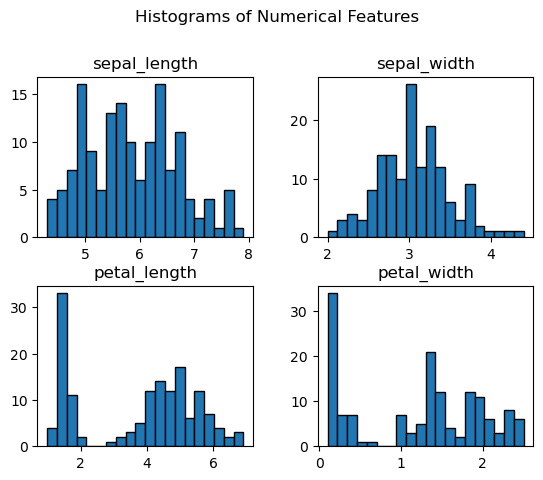

NameError: name 'sns' is not defined

<Figure size 1500x1000 with 0 Axes>

In [9]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns

# Visualize distributions using histograms
plt.figure(figsize=(15, 10))
df[numeric_columns].hist(bins=20, edgecolor='black', grid=False)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

# Visualize distributions using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.title("Box Plots of Numerical Features")
plt.show()

# Visualize relationships between numerical features using scatter plots
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Scatter Plots of Numerical Features by Species", y=1.02)
plt.show()

In [10]:
import seaborn as sns

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Explore relationships between numerical features using a pair plot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Numerical Features by Species", y=1.02)
plt.show()

ValueError: could not convert string to float: 'setosa'

In [12]:
# Count missing values per column
missing_values_count = df.isnull().sum()

# Display missing values count per column
print("Missing Values Count per Column:")
print(missing_values_count)

Missing Values Count per Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [13]:
# Impute missing values using mean for numerical columns
imputer_mean = SimpleImputer(strategy='mean')
df_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)

# Impute missing values using median for numerical columns
imputer_median = SimpleImputer(strategy='median')
df_imputed_median = pd.DataFrame(imputer_median.fit_transform(df), columns=df.columns)

# Impute missing values using mode for categorical columns (assuming there are any)
imputer_mode = SimpleImputer(strategy='most_frequent')
df_imputed_mode = pd.DataFrame(imputer_mode.fit_transform(df), columns=df.columns)

# Impute missing values using K-Nearest Neighbors for numerical columns
imputer_knn = KNNImputer(n_neighbors=2)
df_imputed_knn = pd.DataFrame(imputer_knn.fit_transform(df), columns=df.columns)

# Display the first few rows of the imputed dataframes
print("Imputed DataFrame using Mean:")
print(df_imputed_mean.head())

print("\nImputed DataFrame using Median:")
print(df_imputed_median.head())

print("\nImputed DataFrame using Mode:")
print(df_imputed_mode.head())

print("\nImputed DataFrame using K-Nearest Neighbors:")
print(df_imputed_knn.head())

NameError: name 'SimpleImputer' is not defined

In [14]:
# Display summary statistics before imputation
print("Summary Statistics Before Imputation:")
print(df_original.describe())

# Load the dataset after imputation using mean
df_imputed_mean = pd.read_csv('path_to_mean_imputed_file.csv')  # Replace with the actual filename

# Display summary statistics after imputation
print("\nSummary Statistics After Imputation using Mean:")
print(df_imputed_mean.describe())

Summary Statistics Before Imputation:


NameError: name 'df_original' is not defined

In [15]:
# Display summary statistics before removing duplicates
print("Summary Statistics Before Removing Duplicates:")
print(df_original.mean())

# Load the dataset after removing duplicates
df_no_duplicates = pd.read_csv('path_to_no_duplicates_file.csv')  # Replace with the actual filename

# Display summary statistics after removing duplicates
print("\nSummary Statistics After Removing Duplicates:")
print(df_no_duplicates.mean())

Summary Statistics Before Removing Duplicates:


NameError: name 'df_original' is not defined